# Tu espacio de trabajo en TripleTen

¡Hola! Esto es un Jupyter Notebook, un documento que contiene celdas de texto (lo que estás leyendo ahora mismo) y celdas de código. Lo especial de un Jupyter Notebook es que es interactivo: Puedes cambiar o añadir celdas, y luego ejecutar una celda seleccionándola primero y haciendo clic en el botón de ejecutar celda que hay encima de `( ▶ Run )` o pulsando `Ctrl+Enter`.

# EverPeak - Analysis

## Importar librerías y cargar el dataset
Objetivo: tener el dataset listo en memoría.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

df = pd.read_csv("/datasets/everpeak_retail.csv")

print("df:")
print(df.head())

df:
   order_id  order_date  customer_id product_category  price  quantity  \
0         1  2024-02-02         2616           Sports    269        50   
1         2  2024-10-10         1736          Grocery     66         0   
2         3  2024-08-27         2543           Sports    267         0   
3         4  2024-06-09         2252             Toys    114       125   
4         5  2024-06-07         1583          Fashion    729        16   

   order_value payment_method         city state  customer_age  
0        13385    credit_card     New York    NY          66.0  
1          660     debit_card  Los Angeles    CA          24.0  
2         5073    credit_card      Chicago    IL          23.0  
3        14290    credit_card     New York    NY          70.0  
4        11754    credit_card      Houston    TX          75.0  


## Explorar el dataset

In [2]:
df.describe()

,order_id,customer_id,price,quantity,order_value,customer_age
count,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,4858.000000
mean,2504.500000,1988.362420,756.187500,21.871406,10071.564696,43.728695
std,1445.829404,569.889309,1172.528065,63.303488,12398.053370,77.130195
min,1.000000,1000.000000,12.000000,0.000000,12.000000,-999.000000
25%,1252.750000,1495.000000,218.750000,0.000000,3096.250000,34.000000
50%,2504.500000,1988.000000,457.000000,0.000000,10339.500000,49.000000
75%,3756.250000,2475.000000,847.000000,22.000000,13159.250000,65.000000
max,5008.000000,2999.000000,36708.000000,1266.000000,303824.000000,80.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5008 non-null   int64  
 1   order_date        5000 non-null   object 
 2   customer_id       5008 non-null   int64  
 3   product_category  5008 non-null   object 
 4   price             5008 non-null   int64  
 5   quantity          5008 non-null   int64  
 6   order_value       5008 non-null   int64  
 7   payment_method    5008 non-null   object 
 8   city              4908 non-null   object 
 9   state             4908 non-null   object 
 10  customer_age      4858 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 430.5+ KB


## Funciones para manejo de valores atípicos, nulos y demás

In [4]:
def reemplazar_sentinels(df, sentinels, numeric_cols):
    for col in numeric_cols:
        df[col] = df[col].replace(sentinels, pd.NA)
    return df

def rellenar_ausentes(df, cols_fill):
    for col in cols_fill:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Crear función pipeline
def limpiar_df(df):
    valores_erroneos = [-999, 999, 0, 1]
    # Definir columnas numéricas
    columnas_numericas = ["customer_age", "price"]
    
    # Aplicar reemplazo de sentinels
    df = reemplazar_sentinels(df, valores_erroneos, columnas_numericas)
    
    # Aplicar relleno de ausentes
    df = rellenar_ausentes(df, columnas_numericas)
    
    return df

# observar valores ausentes iniciales
print("Valores ausentes iniciales:")
print(df[["customer_age", "price"]].isna().sum())

# Aplicar pipeline completo
df = limpiar_df(df)
print("\nValores ausentes después del pipeline:")
print(df[["customer_age", "price"]].isna().sum())

Valores ausentes iniciales:
customer_age    150
price             0
dtype: int64

Valores ausentes después del pipeline:
customer_age    0
price           0
dtype: int64


## Visualización con Histogramas y Boxplots

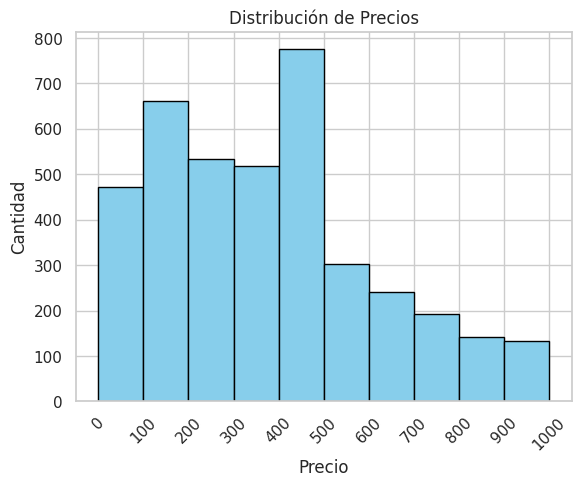

In [5]:
# Graficar histograma
counts, bin_edges, _ = plt.hist(
    df['price'],
    bins=10,
    range=(0, 1000),
    color='skyblue',
    edgecolor='black'
)

# Mostrar las marcas de los bins en el eje X
plt.xticks(bin_edges, rotation=45)

# Etiquetas y título del gráfico
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.title("Distribución de Precios")
plt.show()

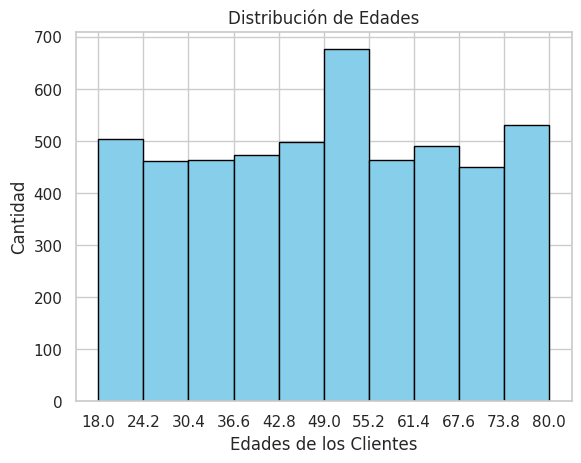

In [6]:
# Graficar histograma, no usamos range ya que todos los datos son visibles
counts, bin_edges, _ = plt.hist(df['customer_age'], bins=10, color='skyblue', edgecolor='black')

# Mostrar las marcas de los bins en el eje X
plt.xticks(bin_edges)

# Etiquetas y título del gráfico
plt.xlabel('Edades de los Clientes')
plt.ylabel('Cantidad')
plt.title('Distribución de Edades')
plt.show()

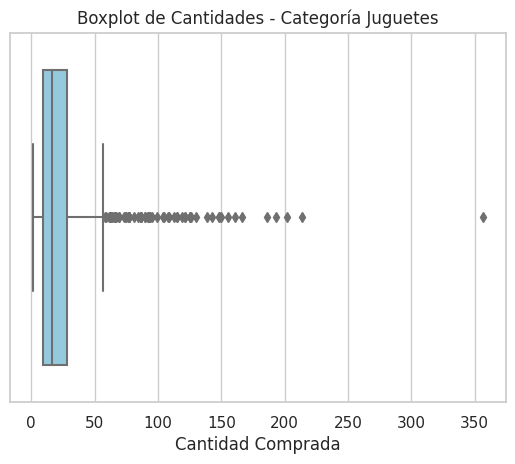

In [7]:
df = pd.read_csv('/datasets/everpeak_clean.csv')
df_toys = df[df['product_category']=='Toys']

# Graficar BoxPlot
sns.boxplot(x=df_toys['quantity'], color='skyblue')
plt.xlabel('Cantidad Comprada')
plt.title('Boxplot de Cantidades - Categoría Juguetes')
plt.show()

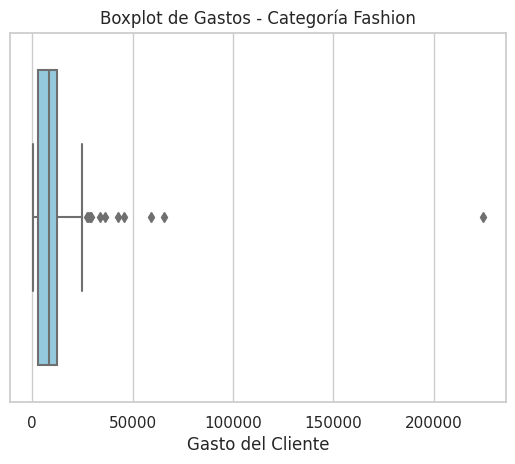

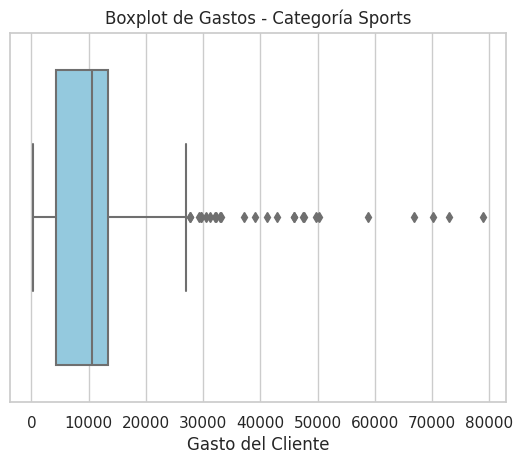

In [8]:
# Filtrar datos
df_fashion = df[df['product_category'] == 'Fashion']
df_sports = df[df['product_category'] == 'Sports']

# BoxPlot Categoría Fashion
sns.boxplot(df_fashion['order_value'],color='skyblue')
plt.xlabel("Gasto del Cliente")
plt.title("Boxplot de Gastos - Categoría Fashion")
plt.show()

# BoxPlot Categoría Sports
sns.boxplot(df_sports['order_value'],color='skyblue')
plt.xlabel("Gasto del Cliente")
plt.title("Boxplot de Gastos - Categoría Sports")
plt.show()

## Segmentación para el análisis de clientes

In [9]:
# ----- IQR -----
# calcular Q1, Q3 e IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1

# calcular límite inferior y superior
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# ----- Z-score -----
# calcular media, desviación estándar y z-score
mean = df['price'].mean()
std = df['price'].std()
df['z'] = (df['price'] - mean) / std

# ----- Mostrar resultados -----
print('Outliers usando IQR:')
print(df[(df['price'] < lower) | (df['price'] > upper)])

print('\nOutliers usando Z-Score:')
print(df[df['z'].abs() > 3])

Outliers usando IQR:
      order_id  order_date  customer_id product_category  price  quantity  \
64          65  2024-05-30         1651           Sports   2106         5   
67          68  2024-05-15         2385             Home   5181         4   
95          96  2024-04-15         2991           Sports   1940         4   
123        124  2024-06-21         1389      Electronics   1947        16   
138        139  2024-05-07         2274      Electronics   2437         6   
...        ...         ...          ...              ...    ...       ...   
4955      4956  2024-03-11         2230      Electronics   3824         6   
4974      4975  2024-10-20         2627      Electronics   1985         6   
4984      4985  2024-03-11         2509           Sports   1911         4   
4990      4991  2024-08-25         2569           Sports   2856         5   
4997      4998  2024-10-26         2838      Electronics   2699         4   

      order_value payment_method         city    state

In [10]:
def classify_payment(row):
    card = row['payment_method']
    qty = row['quantity']

    # 1. Manejo de valores nulos/faltantes
    if pd.isna(card) or pd.isna(qty):
        return "Error en Datos"

    # --- 2. Segmentación de Altas Cantidades ---
    if qty > 22:
        if card == "credit_card" or card == 'debit_card':
            return "card_high_volume"
        else: 
            return "no_card_high_volume"
            
    # --- 3. Segmentación Bajas Cantidades ---
    elif qty <= 22:
        if card == "credit_card" or card == 'debit_card':
            return "card_low_volume"
        else: 
            return "no_card_low_volume"

# aplicar función y verificar cambios
df['payment_segment'] = df.apply(classify_payment, axis=1)
print(df['payment_segment'].value_counts())

card_low_volume        2704
no_card_low_volume     1035
card_high_volume        922
no_card_high_volume     339
Name: payment_segment, dtype: int64
